In [1]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
df = pd.read_csv('응시자 데이터.csv')
df.columns = ['ad_id', 'title', 'region_name', 'male', 'female',
              '10gen', '20gen', '30gen', '40gen', '50gen', '60gen', 
              'total_gazed', 'total_data', 'target_info']
df['target_info'] = df['target_info'].apply(ast.literal_eval)
df_ad_gender = df[['title', 'male','female','target_info']]
df_ad_age = df[['title', '10gen', '20gen', '30gen', '40gen', '50gen', '60gen', 'total_gazed', 'target_info']]

In [3]:
df = pd.read_csv('유동인구 데이터.csv')
df.columns = ['ad_id', 'title', 'region_name', 'male', 'female',
              '10gen', '20gen', '30gen', '40gen', '50gen', '60gen', 
              'total_gazed', 'total_data', 'target_info']
df['target_info'] = df['target_info'].apply(ast.literal_eval)
df_gender = df[['title', 'male','female','target_info']]
df_age = df[['title', '10gen', '20gen', '30gen', '40gen', '50gen', '60gen', 'total_gazed', 'target_info']]

In [4]:
product = list(df['title'].unique())

응시 인원/전체 인원 -> percentage로 barchart!!

In [5]:
age_col = ['10gen', '20gen', '30gen', '40gen', '50gen', '60gen']
data = pd.DataFrame(columns = ['title', '10gen', '20gen', '30gen', '40gen', '50gen', '60gen', 'target_info'])
data[['title', 'target_info']] = df_ad_gender[['title', 'target_info']]
data[age_col] = (df_ad_age[age_col]/df_age[age_col])*100
data = data.fillna(0)

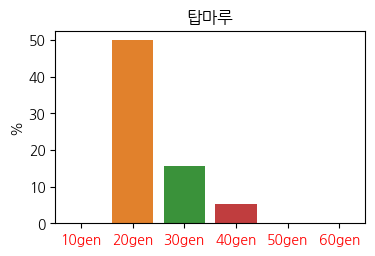

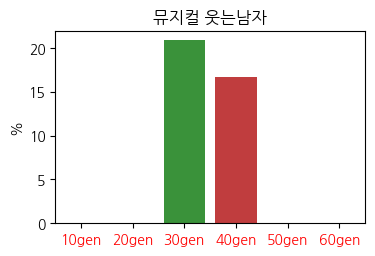

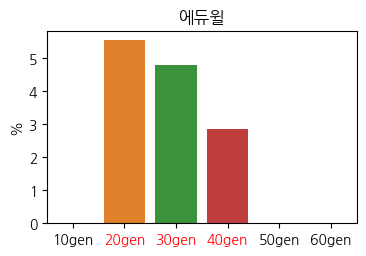

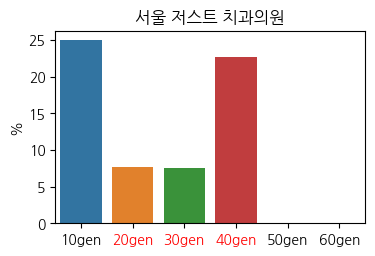

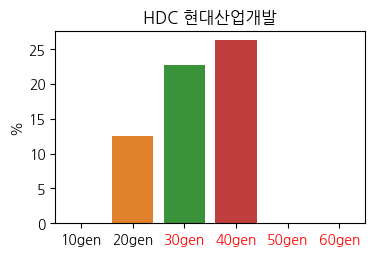

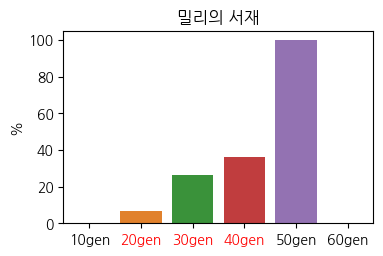

In [7]:
target = product[0]
i = 0
for target in product:
    gen_list = data.loc[data['title'] == target, 'target_info'][i][1:]
    gen_list = [f'{i}gen' for i in range(10, 70, 10) if f'{i}gen' in gen_list]
#print(gen_list)
    values = data.loc[data['title'] == target]#, gen_list]

    plt.figure(figsize=(4,2.5))
    sns.barplot(values)
    plt.title(target)
    plt.ylabel('%')
    
    ax = plt.gca()
    labels = ax.get_xticklabels()
    for label in labels:
        if label.get_text() in gen_list:
            label.set_color('red')
        else:
            label.set_color('black')
    plt.show()
    i += 1
#for gen in gen_list: